# Machine Learning Modeling And Evaluation


In [128]:
#importing the required libraries

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [129]:
# Loading the Cleaned Dataset

df = pd.read_csv('Cleaned_Dataset.csv')
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,1,0,0.013889,0,0,1,1,2,...,0.115423,0.001275,0,0,0,1,0,1,0,0
1,1,0,0,0,0.472222,1,1,1,2,1,...,0.385075,0.215867,0,0,0,0,1,0,1,0
2,1,0,0,0,0.027778,1,1,1,2,2,...,0.354229,0.010310,1,0,0,0,1,1,0,0
3,1,0,0,0,0.625000,0,0,1,2,1,...,0.239303,0.210241,0,1,0,0,0,0,1,0
4,0,0,0,0,0.027778,1,1,2,1,1,...,0.521891,0.015330,1,0,0,1,0,1,0,0


In [53]:
# Selecting the Most Important Features and Creating a New Feature(tenure % MonthlyCharges)

df['tenure%MonthlyCharges'] = df['tenure']%df['MonthlyCharges']
df2 = df[['Contract_Month-to-month','Contract_One year','Contract_Two year','TechSupport','OnlineSecurity','tenure','MonthlyCharges','tenure%MonthlyCharges','OnlineBackup','InternetService','PaperlessBilling','SeniorCitizen','Churn']]
df2.dropna(inplace=True)
df2.head()


C:\Users\92321\AppData\Local\Temp\ipykernel_15708\1006656566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


,Contract_Month-to-month,Contract_One year,Contract_Two year,TechSupport,OnlineSecurity,tenure,MonthlyCharges,tenure%MonthlyCharges,OnlineBackup,InternetService,PaperlessBilling,SeniorCitizen,Churn
0,1,0,0,1,1,0.013889,0.115423,0.013889,2,1,1,0,0
1,0,1,0,1,2,0.472222,0.385075,0.087148,1,1,0,0,0
2,1,0,0,1,2,0.027778,0.354229,0.027778,2,1,1,0,1
3,0,1,0,2,2,0.625000,0.239303,0.146393,1,1,0,0,0
4,1,0,0,1,1,0.027778,0.521891,0.027778,1,2,1,0,1


In [54]:
# Separating the Target Variable from the Independent Variables

Y = df2['Churn']
X = df2[['Contract_Month-to-month','Contract_One year','Contract_Two year','TechSupport','OnlineSecurity','tenure','MonthlyCharges','tenure%MonthlyCharges','OnlineBackup','InternetService','PaperlessBilling','SeniorCitizen']]


# XGBoost Classifier

This model was trained with a test_size of 0.2 and a random state of 67

Accuracy: 0.78
Confusion Matrix:
[[907 112]
 [192 196]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1019
           1       0.64      0.51      0.56       388

    accuracy                           0.78      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



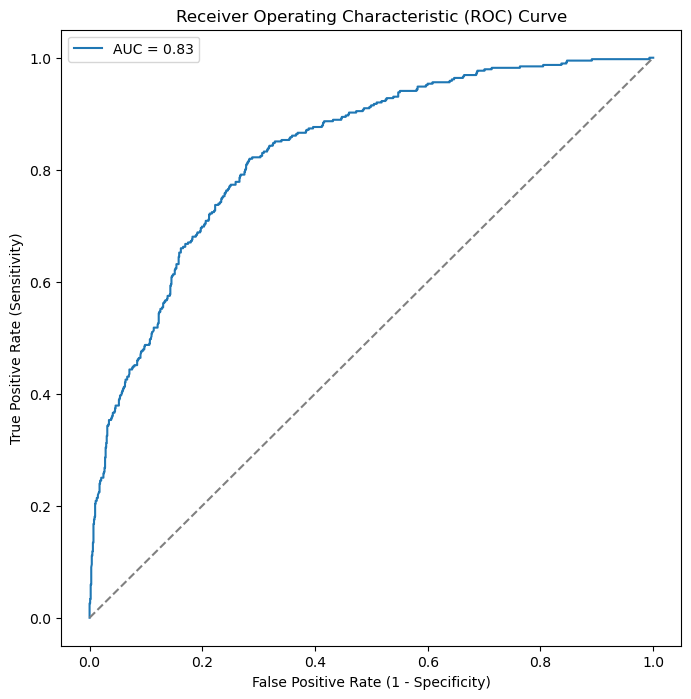

In [116]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=67)

# Create an XGBoost classifier
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()





This model was trained with a test_size of 0.3 and a random state of 67

Accuracy: 0.79
Confusion Matrix:
[[1386  160]
 [ 288  276]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1546
           1       0.63      0.49      0.55       564

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



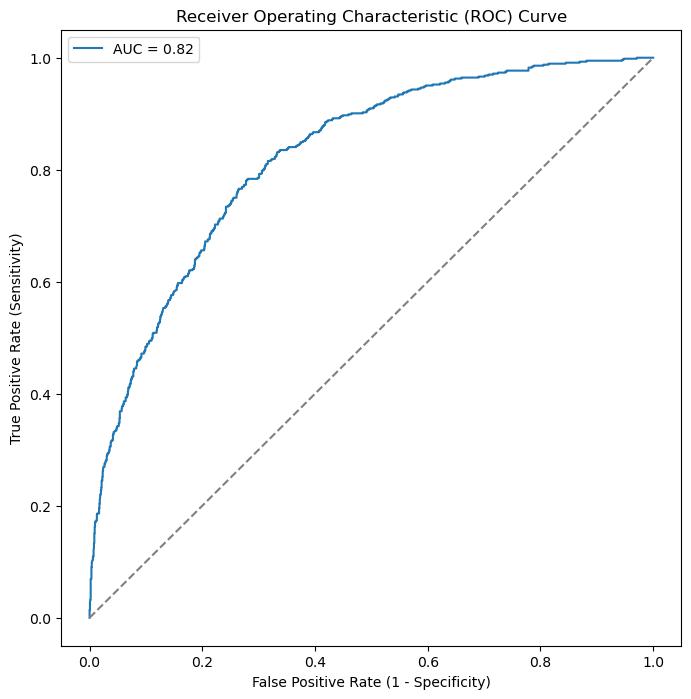

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=67)

# Create an XGBoost classifier
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()




This model was trained with test_size=0.3,random_state=3,learning_rate=0.01,max_depth=7,n_estimators=100

Accuracy: 0.79
Confusion Matrix:
[[1511   67]
 [ 374  158]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1578
           1       0.70      0.30      0.42       532

    accuracy                           0.79      2110
   macro avg       0.75      0.63      0.65      2110
weighted avg       0.78      0.79      0.76      2110



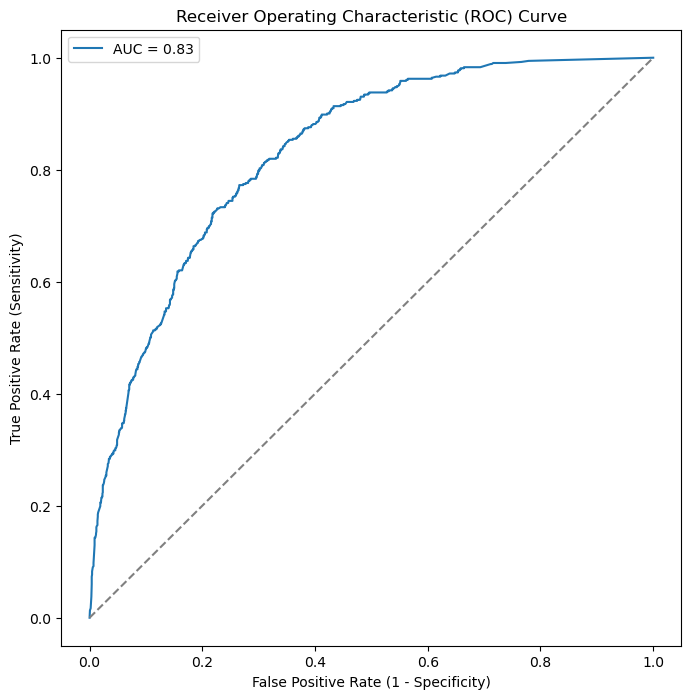

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

# Create an XGBoost classifier
model = xgb.XGBClassifier(learning_rate=0.01,max_depth=7,n_estimators=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()



# Model With Highest Accuracy

This model was trained with test_size=0.3,random_state=3,learning_rate=0.01,max_depth=7,n_estimators=200. It has the highest accuracy among all the models we evaluated.

Accuracy: 0.80
Confusion Matrix:
[[1451  127]
 [ 297  235]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1578
           1       0.65      0.44      0.53       532

    accuracy                           0.80      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.80      0.79      2110



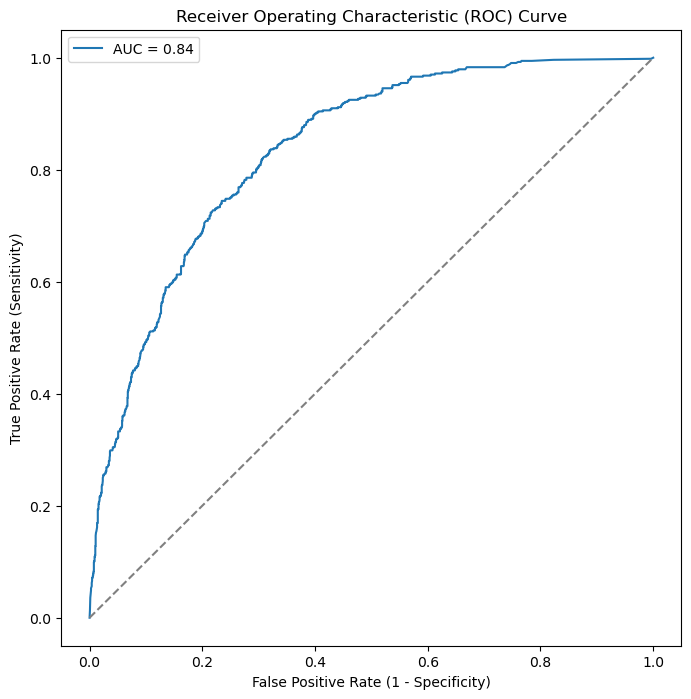

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

# Create an XGBoost classifier
model = xgb.XGBClassifier(learning_rate=0.01,max_depth=7,n_estimators=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()




This model was trained with test_size=0.1,random_state=3,learning_rate=0.01,max_depth=7,n_estimators=200,subsample=0.8. We reduced the test_size to 0.1 and fine tuned the subsample hyper parameter in hopes of increasing the accuracy of the model above but making these changes didn't change the accuracy.

Accuracy: 0.80
Confusion Matrix:
[[491  36]
 [108  69]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       527
           1       0.66      0.39      0.49       177

    accuracy                           0.80       704
   macro avg       0.74      0.66      0.68       704
weighted avg       0.78      0.80      0.78       704



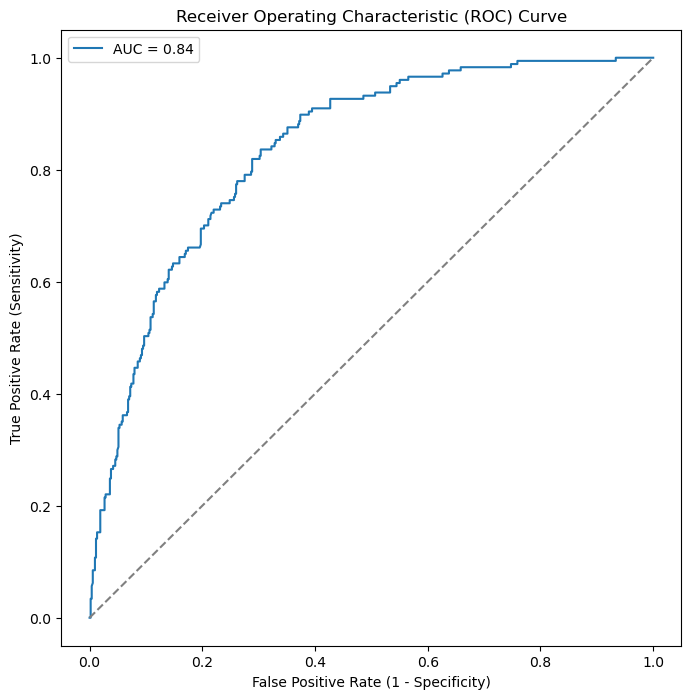

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=3)

# Create an XGBoost classifier
model = xgb.XGBClassifier(learning_rate=0.01,max_depth=7,n_estimators=200,subsample=0.8)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()




# Logistic Regression Model

This model was trained with test_size=0.3,random_state=42,penalty='l2'.

Accuracy: 0.79
Confusion Matrix:
[[1397  150]
 [ 286  277]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1547
           1       0.65      0.49      0.56       563

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



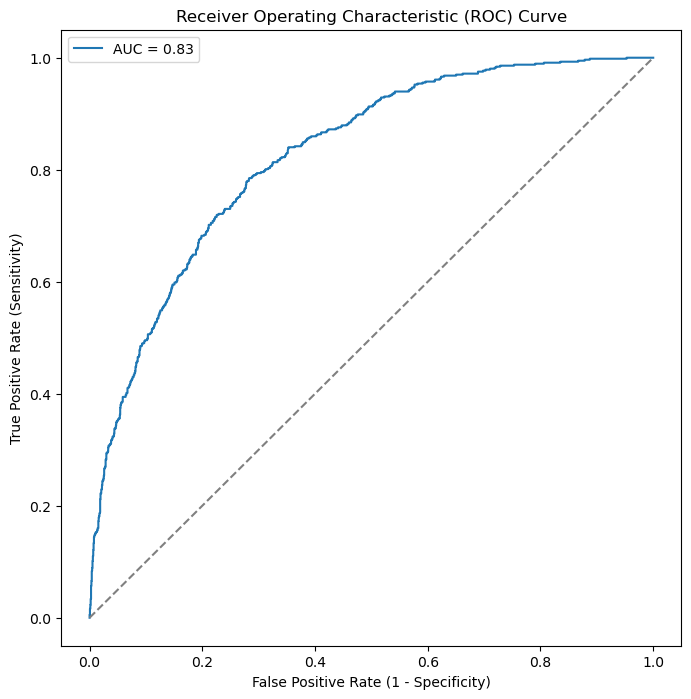

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create a logistic regression model
model2 = LogisticRegression(penalty='l2')

# Train the model
model2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model2.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get predicted probabilities for the positive class
y_probs = model2.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()



This model was trained with test_size=0.3,random_state=56,C=1.0.

Accuracy: 0.79
Confusion Matrix:
[[1390  172]
 [ 265  283]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1562
           1       0.62      0.52      0.56       548

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.79      2110



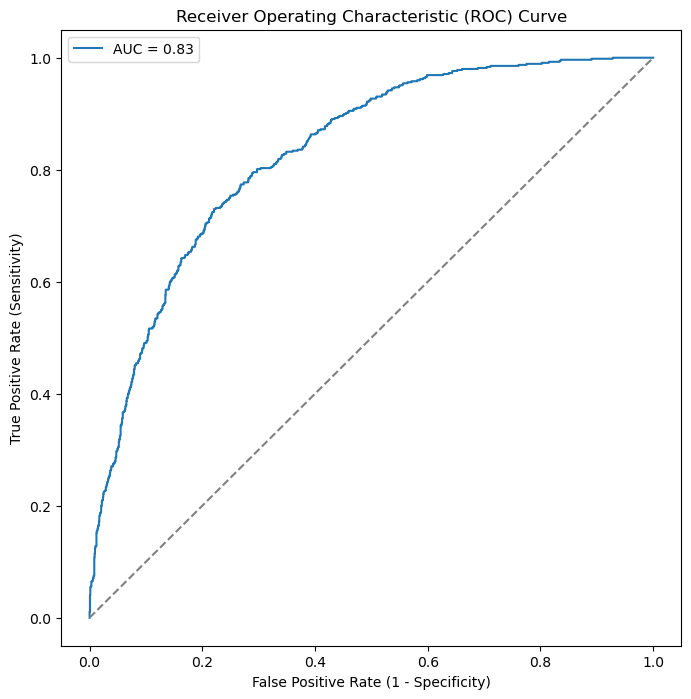

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=56)

# Create a logistic regression model
model2 = LogisticRegression(C=1.0)

# Train the model
model2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model2.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get predicted probabilities for the positive class
y_probs = model2.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()



# Random Forest Classifier

This model was trained with test_size=0.2,random_state=42,n_estimators=100,random_state=42.

Accuracy: 0.77
Confusion Matrix:
[[918 112]
 [205 172]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1030
           1       0.61      0.46      0.52       377

    accuracy                           0.77      1407
   macro avg       0.71      0.67      0.69      1407
weighted avg       0.76      0.77      0.76      1407



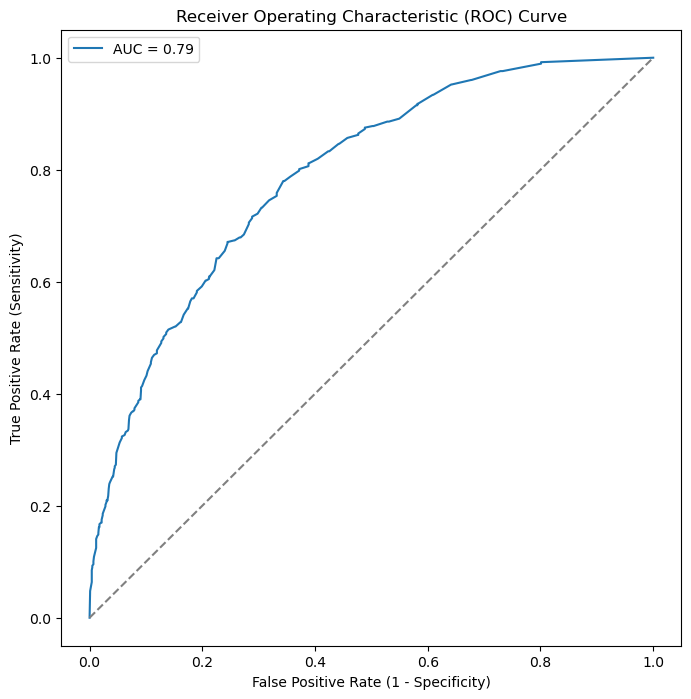

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
model3 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model3.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get predicted probabilities for the positive class
y_probs = model3.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()




This model was trained with test_size=0.3,random_state=3,n_estimators=100, random_state=3.

Accuracy: 0.78
Confusion Matrix:
[[1399  179]
 [ 276  256]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1578
           1       0.59      0.48      0.53       532

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.77      0.78      0.78      2110



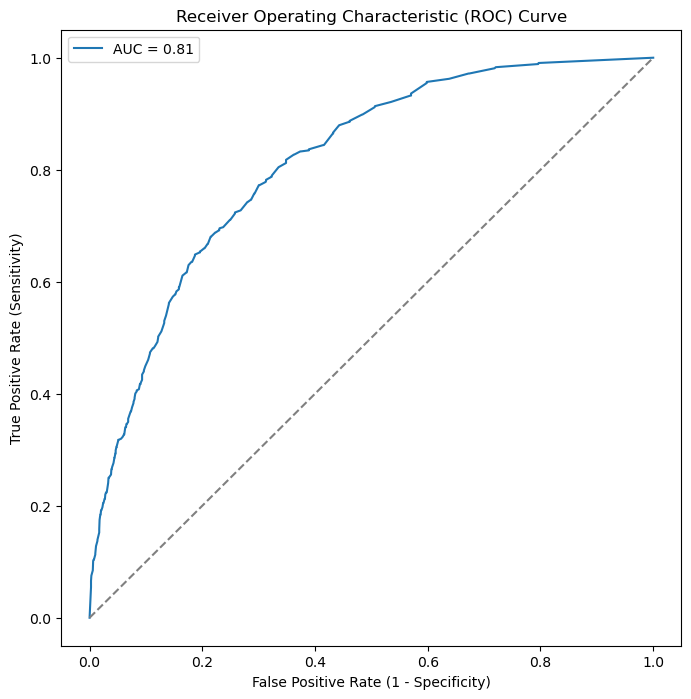

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

# Create a Random Forest classifier
model3 = RandomForestClassifier(n_estimators=100, random_state=3)

# Train the model
model3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model3.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get predicted probabilities for the positive class
y_probs = model3.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()




This model was trained with test_size=0.4,random_state=67,n_estimators=100,random_state=67.

Accuracy: 0.79
Confusion Matrix:
[[1842  227]
 [ 371  373]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2069
           1       0.62      0.50      0.56       744

    accuracy                           0.79      2813
   macro avg       0.73      0.70      0.71      2813
weighted avg       0.78      0.79      0.78      2813



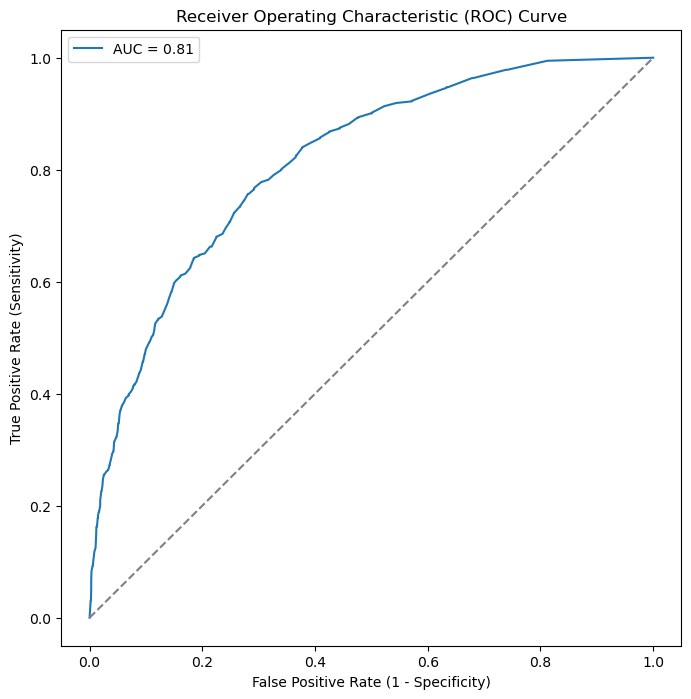

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=67)

# Create a Random Forest classifier
model3 = RandomForestClassifier(n_estimators=100, random_state=67)

# Train the model
model3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model3.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get predicted probabilities for the positive class
y_probs = model3.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()




# Decision Tree Classifier

This model was trained with test_size=0.3 and random_state=42. It has the lowest accuracy among all the models we evaluated.

Accuracy: 0.72
Confusion Matrix:
[[1242  305]
 [ 296  267]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1547
           1       0.47      0.47      0.47       563

    accuracy                           0.72      2110
   macro avg       0.64      0.64      0.64      2110
weighted avg       0.72      0.72      0.72      2110



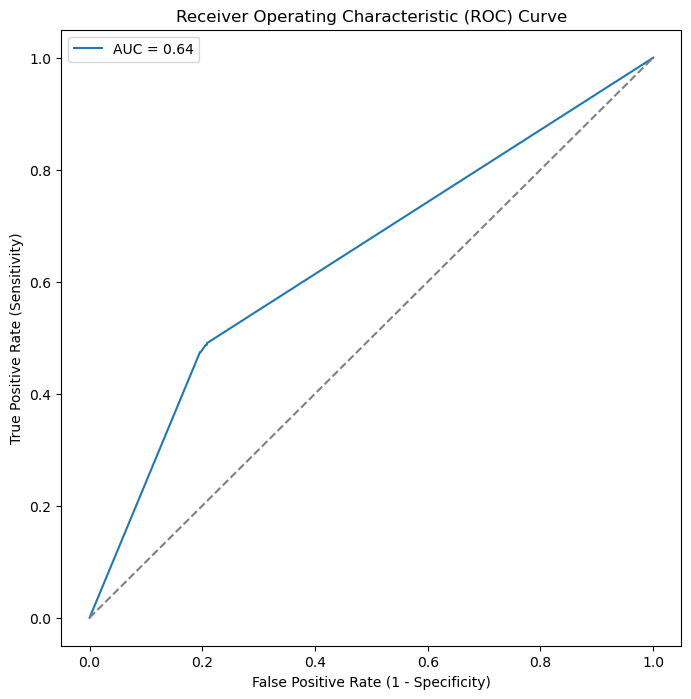

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier
model4 = DecisionTreeClassifier(random_state=42)

# Train the model
model4.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model4.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get predicted probabilities for the positive class
y_probs = model4.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()


